Working on some plotting tools for the BEM project. This will eventually get rolled into its own tool

In [1]:
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
my_data = genfromtxt('solution.csv', delimiter=',')
X = my_data[:,0]
Y = my_data[:,1]
inside = my_data[:,2]
Z = my_data[:,3]

X = X.reshape([500, 500]);
Y = Y.reshape([500, 500]);
inside = inside.reshape([500, 500]);
Z = Z.reshape([500, 500]);
Z[inside==0]=0

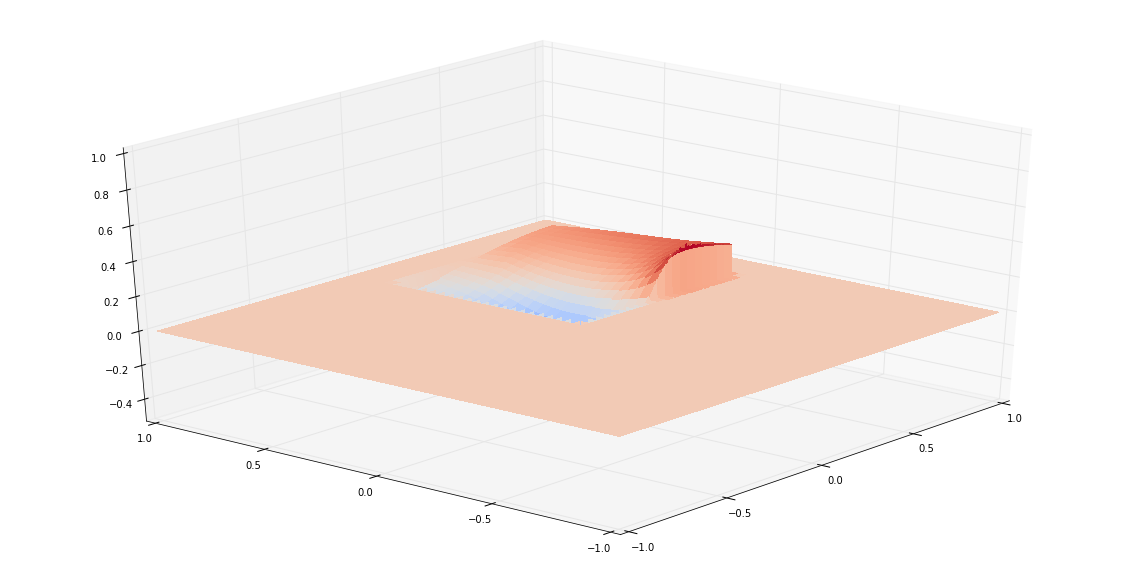

In [6]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax.set_zlim(-0.5, 1);
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
angle = 220
ax.view_init(30, angle)

In [34]:
## there seems to be an issue with raycasting - checking this out here


array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       ..., 
       [-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996]])